In [35]:
!pip install wordcloud


In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import re
from collections import Counter

In [65]:
df = pd.read_csv('cleaned_twitter_data (3).csv')

In [66]:
df.head()

,target,stemmed_content
0,0,switchfoot http twitpic com zl awww bummer sho...
1,0,upset updat facebook text might cri result sch...
2,0,kenichan dive mani time ball manag save rest g...
3,0,whole bodi feel itchi like fire
4,0,nationwideclass behav mad see


In [67]:
df.shape

(1600000, 2)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 2 columns):
 #   Column           Non-Null Count    Dtype 
---  ------           --------------    ----- 
 0   target           1600000 non-null  int64 
 1   stemmed_content  1599505 non-null  object
dtypes: int64(1), object(1)
memory usage: 24.4+ MB


In [69]:
df.describe()

,target
count,1600000.0
mean,0.5
std,0.5
min,0.0
25%,0.0
50%,0.5
75%,1.0
max,1.0


In [70]:
print(df.isnull().sum())


target               0
stemmed_content    495
dtype: int64


In [114]:
df.dropna(inplace=True)

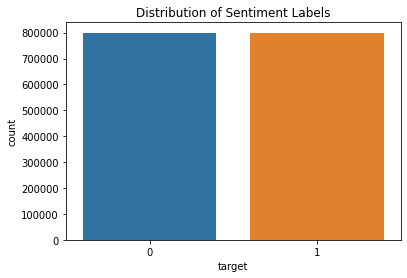

In [115]:
plt.figure(figsize=(6, 4))         
sns.countplot(x='target', data=df) 
plt.title('Distribution of Sentiment Labels')
plt.show()                         

In [73]:
df.shape

(1599505, 2)

In [74]:
df['tweet_length'] = df['stemmed_content'].apply(len)

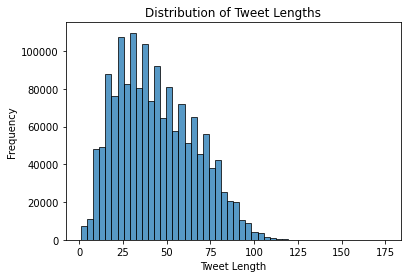

In [113]:
plt.hist(df['tweet_length'], bins=50, alpha=0.75, edgecolor='black')
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.show()

In [76]:
df.shape

(1599505, 3)

In [77]:
df.head()

,target,stemmed_content,tweet_length
0,0,switchfoot http twitpic com zl awww bummer sho...,75
1,0,upset updat facebook text might cri result sch...,65
2,0,kenichan dive mani time ball manag save rest g...,53
3,0,whole bodi feel itchi like fire,31
4,0,nationwideclass behav mad see,29


In [92]:
all_words = ' '.join(df['stemmed_content'])
word_counts = Counter(all_words.split())

In [93]:
most_common_words = word_counts.most_common(20)
words, counts = zip(*most_common_words)

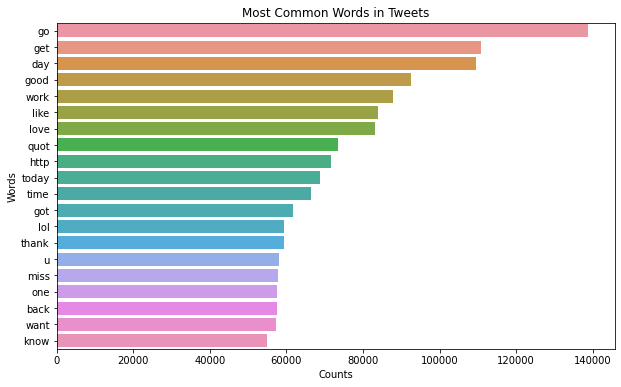

In [96]:
words = list(words)  
counts = list(counts)

plt.figure(figsize=(10, 6))
sns.barplot(x=counts, y=words) 
plt.title('Most Common Words in Tweets')
plt.xlabel('Counts')  
plt.ylabel('Words')  
plt.show()


In [97]:
assert len(words) == len(counts)

In [99]:
df.head()

,target,stemmed_content,tweet_length
0,0,switchfoot http twitpic com zl awww bummer sho...,75
1,0,upset updat facebook text might cri result sch...,65
2,0,kenichan dive mani time ball manag save rest g...,53
3,0,whole bodi feel itchi like fire,31
4,0,nationwideclass behav mad see,29


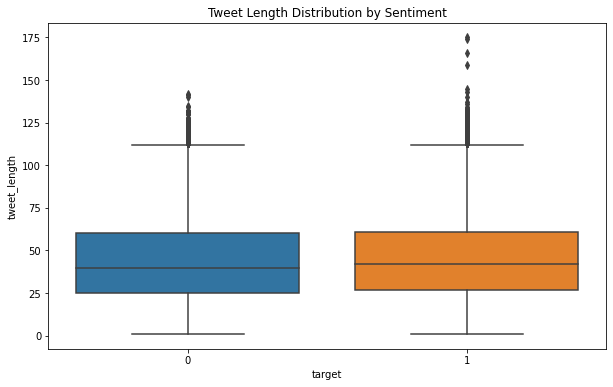

In [110]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='tweet_length', data=df)
plt.title('Tweet Length Distribution by Sentiment')
plt.show()

In [111]:
mean_length = df.groupby('target')['tweet_length'].mean()
print(mean_length)

target
0    43.192657
1    44.665742
Name: tweet_length, dtype: float64


In [103]:
positive_tweets = ' '.join(df[df['target'] == 1]['stemmed_content'])
negative_tweets = ' '.join(df[df['target'] == 0]['stemmed_content'])

In [104]:
wordcloud_positive = WordCloud(stopwords=STOPWORDS, background_color='white', width=800, height=400).generate(positive_tweets)


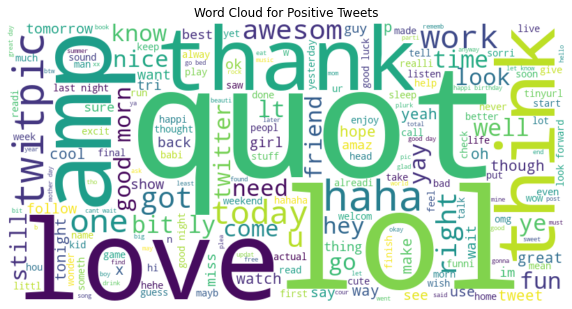

In [105]:
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Tweets')
plt.show()

In [106]:
wordcloud_negative = WordCloud(stopwords=STOPWORDS, background_color='black', width=800, height=400).generate(negative_tweets)

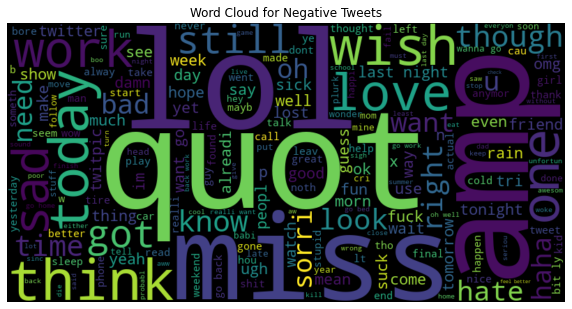

In [107]:
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Tweets')
plt.show()

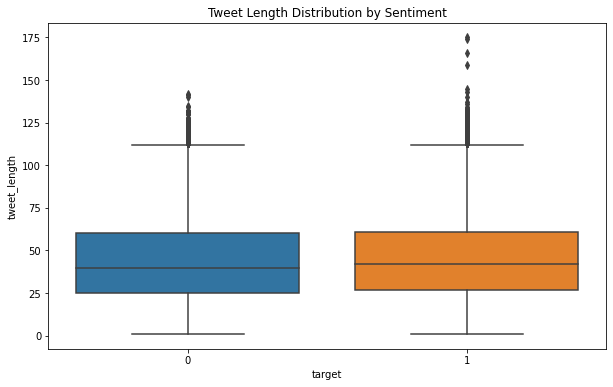

In [108]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='tweet_length', data=df)
plt.title('Tweet Length Distribution by Sentiment')
plt.show()